# Exploratory Data Analysis and Visualization

## Introduction

This notebook performs an Exploratory Data Analysis (EDA) and visualization on the dataset `final_data.csv`, which was scraped and merged in the notebooks located in the `01_data_collection` folder. For details on the data collection and merging process, refer to those notebooks.

The goal of this analysis is to uncover patterns, trends, and insights within the dataset through statistical summaries and visualizations. We will examine the data's structure, identify missing values, and explore relationships between variables. This EDA serves as a foundation for understanding the dataset's characteristics before the hypothesis tests.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pycountry
import pycountry_convert as pc

In [3]:
df = pd.read_csv('../data/final_data.csv')
df.head()

,name,country,gender,boulder_points,lead_points,combined_points,highest_grade,count_8c_plus,avg_grade_first5
0,Sorato Anraku,JPN,male,3835.0,2281.0,6508.0,NaN,NaN,NaN
1,Dohyun Lee,KOR,male,3708.0,2123.0,4710.0,NaN,NaN,NaN
2,Meichi Narasaki,JPN,male,3055.0,NaN,NaN,NaN,NaN,NaN
3,Sohta Amagasa,JPN,male,2967.0,NaN,NaN,NaN,NaN,NaN
4,Tomoa Narasaki,JPN,male,2459.0,415.0,2860.0,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551 entries, 0 to 550
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              551 non-null    object 
 1   country           551 non-null    object 
 2   gender            551 non-null    object 
 3   boulder_points    429 non-null    float64
 4   lead_points       316 non-null    float64
 5   combined_points   195 non-null    float64
 6   highest_grade     157 non-null    float64
 7   count_8c_plus     61 non-null     float64
 8   avg_grade_first5  157 non-null    float64
dtypes: float64(6), object(3)
memory usage: 38.9+ KB


In [5]:
df.shape

(551, 9)

Our dataset has a total of **551 unique climbers** with 9 columns

#### Summary Statistics
Now let's look at the summary statistics of our dataset

In [6]:
df.describe()

,boulder_points,lead_points,combined_points,highest_grade,count_8c_plus,avg_grade_first5
count,429.000000,316.000000,195.000000,157.000000,61.000000,157.000000
mean,301.124242,372.655380,857.554872,21.847134,16.180328,19.323439
std,581.401670,643.704321,1311.443736,4.081173,51.418060,3.806938
min,1.000000,1.000000,4.000000,3.000000,1.000000,3.000000
25%,12.000000,12.000000,50.000000,20.000000,1.000000,18.000000
50%,69.000000,48.500000,237.800000,23.000000,5.000000,20.210000
75%,282.500000,421.000000,1076.750000,25.000000,12.000000,21.790000
max,3835.000000,3220.000000,6508.000000,29.000000,388.000000,25.540000


As you can see from the output, we have:

**Competition Participation:**
  - 429 climbers competed in **bouldering**
  - 316 climbers competed in **lead**
  - 195 climbers competed in **combined**

**Profile Data:**
  - Out of the 551 climbers, only **157** have an **8a.nu profile**
    - Of those, only **61** have an ascent grade of **8c+ or above**

#### Gender Distribution
Let's look at the gender distribution of our dataset

In [7]:
print("Gender Distribution:")
# Calculate gender counts and percentages
gender_counts = df['gender'].value_counts()
gender_percentages = df['gender'].value_counts(normalize=True) * 100

# Print compact output
for gender, count in gender_counts.items():
    print(f"{gender.capitalize()}: {count} climbers ({gender_percentages[gender]:.2f}%)")

Gender Distribution:
Male: 294 climbers (53.36%)
Female: 257 climbers (46.64%)


The data shows a near equal split between male and female climbers. This distribution aligns with expectations, as the IFSC strives to maintain balanced gender representation in its competitions, such as World Cups and Championships.

#### Country Distribution
Top 10 countries

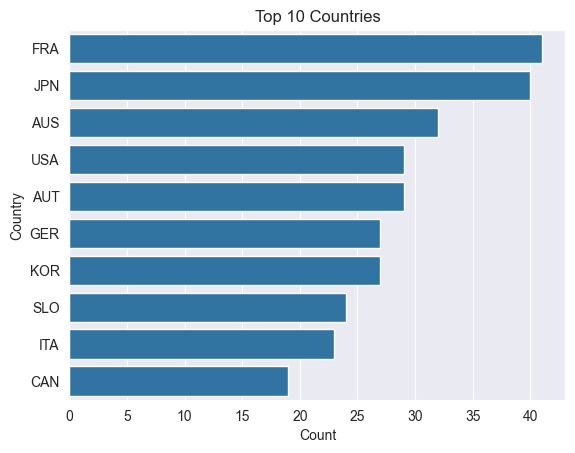

In [8]:
top_countries = df['country'].value_counts().head(10)
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.xlabel('Count')
plt.ylabel('Country')
plt.title('Top 10 Countries')
plt.show()

#### NaN Values
Percentage of NaN values in each column:

In [9]:
df.isnull().sum() / df.shape[0]

name                0.000000
country             0.000000
gender              0.000000
boulder_points      0.221416
lead_points         0.426497
combined_points     0.646098
highest_grade       0.715064
count_8c_plus       0.889292
avg_grade_first5    0.715064
dtype: float64

As we can see from the output, the data has quite high percentages of NaN values. There are two main reasons for this:
1. **Climbers not participating in specific disciplines** (boulder_points, lead_points, combined_points)
2. **Climbers not having an 8a.nu account** (highest_grade, count_8c_plus, avg_grade_first5)

Because of this, imputation is not a viable way of handling the missing values. Instead, let's segment the data into disciplines and if the climber has outdoor sports data or not.

## Discipline Specific Analysis

Let's create subsets for each discipline

In [10]:
boulder_athletes = df[df['boulder_points'] > 0]
lead_athletes= df[df['lead_points'] > 0]
combined_athletes = df[df['combined_points'] > 0]

#### Distribution of Bouldering Points
Let's start by analyzing the boulder discipline

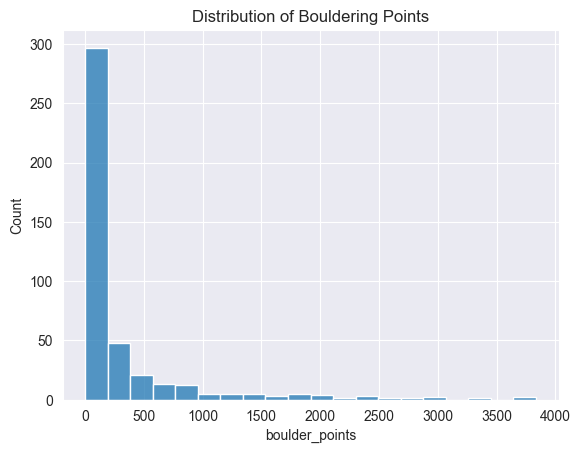

In [11]:
sns.histplot(boulder_athletes['boulder_points'], bins=20)
plt.title('Distribution of Bouldering Points')
plt.show()

The boulder_points data is very right skewed, with most values below 1000 and a few reaching as high as 3380. This reflects both performance variation and the number of competitions attended — climbers who compete more often accumulate more points, contributing to the skew.

**Other disciplines show a similar skew for the same reason.**
To handle this, let's take the log transform of the distributions

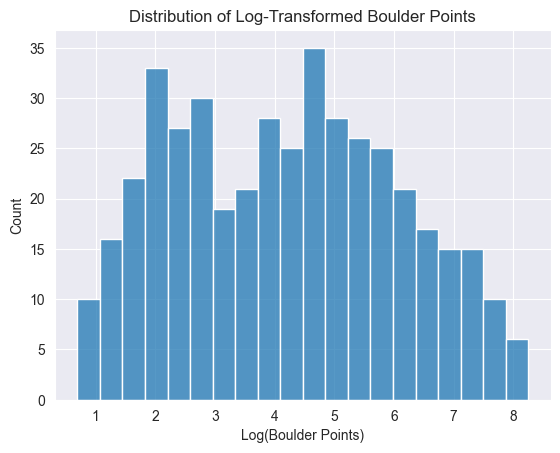

In [13]:
# Apply log transformation (add 1 to avoid log(0) issues)
boulder_athletes.loc[:, 'log_boulder_points'] = np.log1p(boulder_athletes['boulder_points'])

# Plot histogram of log-transformed data
sns.histplot(boulder_athletes['log_boulder_points'], bins=20)
plt.title('Distribution of Log-Transformed Boulder Points')
plt.xlabel('Log(Boulder Points)')
plt.show()

#### Distribution of Lead Points

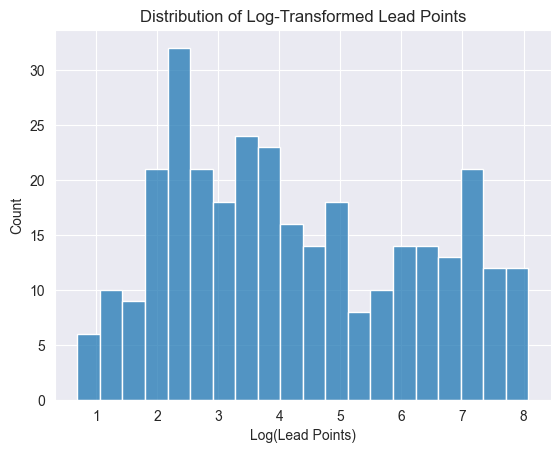

In [15]:
# Apply log transformation (add 1 to avoid log(0) issues)
lead_athletes.loc[:,'log_lead_points'] = np.log1p(lead_athletes['lead_points'])

# Plot histogram of log-transformed data
sns.histplot(lead_athletes['log_lead_points'], bins=20)
plt.title('Distribution of Log-Transformed Lead Points')
plt.xlabel('Log(Lead Points)')
plt.show()

#### Distribution of Combined Points

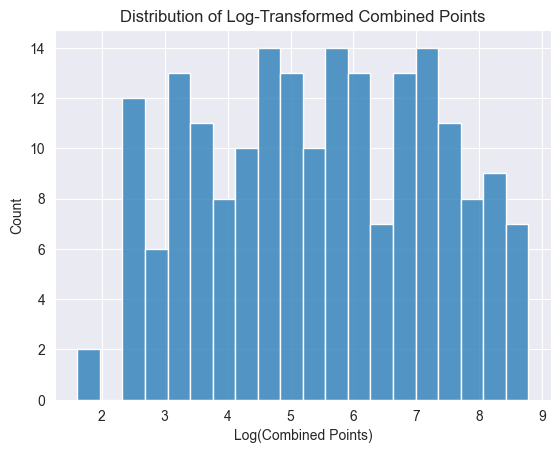

In [17]:
# Apply log transformation (add 1 to avoid log(0) issues)
combined_athletes.loc[:,'log_combined_points'] = np.log1p(combined_athletes['combined_points'])

# Plot histogram of log-transformed data
sns.histplot(combined_athletes['log_combined_points'], bins=20)
plt.title('Distribution of Log-Transformed Combined Points')
plt.xlabel('Log(Combined Points)')
plt.show()

## Relationship between disciplines
Explore relationships between variables to uncover patterns and correlations.

Compare **boulder_points vs. lead_points**

<Axes: xlabel='boulder_points', ylabel='lead_points'>

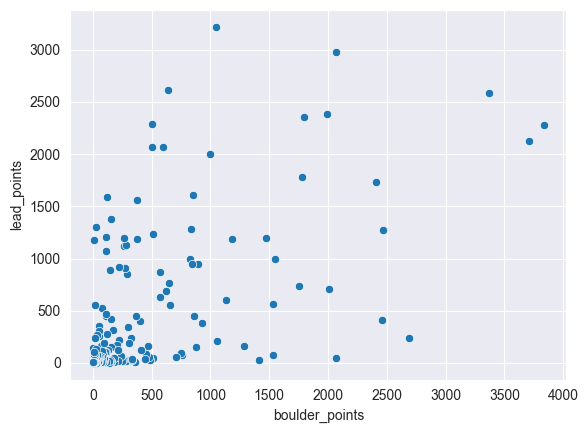

In [18]:
sns.scatterplot(x='boulder_points', y='lead_points', data=df)

Analyze **combined_points vs. individual points**

<Axes: xlabel='lead_points', ylabel='combined_points'>

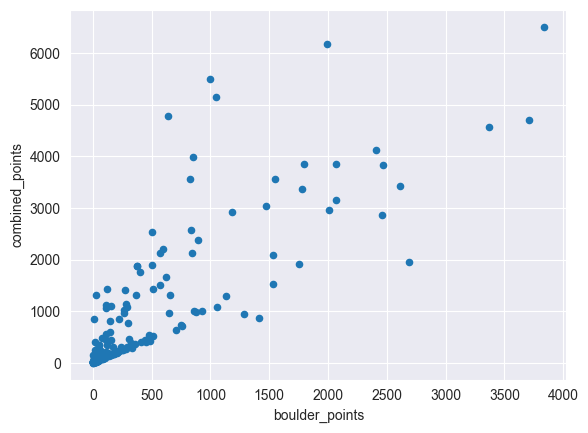

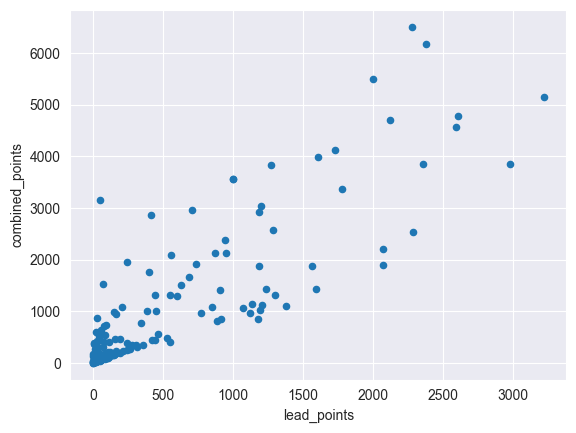

In [19]:
df.plot.scatter(x='boulder_points', y='combined_points')
df.plot.scatter(x='lead_points', y='combined_points')

### Country and Climbing Performance

In [20]:
df['country'].value_counts()

country
FRA    41
JPN    40
AUS    32
USA    29
AUT    29
       ..
COL     1
MGL     1
LUX     1
SRB     1
DEN     1
Name: count, Length: 61, dtype: int64

Since we have 61 unique countries, to better visualize let's create a new column mapping the countries to regions. Pycountry library was used for this mapping.

In [21]:
# Extract unique countries from df['country']
countries = df['country'].unique()  # list of all unique country codes

# Function to map country code to continent
def country_to_continent(country_code):
    try:
        # Convert ISO 3-letter code to country object
        country = pycountry.countries.get(alpha_3=country_code)
        if country:
            # Get continent code and convert to continent name
            continent_code = pc.country_alpha2_to_continent_code(country.alpha_2)
            continent_name = pc.convert_continent_code_to_continent_name(continent_code)
            return continent_name
        else:
            return 'Other'
    except:
        return 'Other'

# Create a dictionary mapping countries to continents
country_to_region = {country: country_to_continent(country) for country in countries}

# Map the regions back to df
df['region'] = df['country'].map(country_to_region)

df['region'].value_counts()

region
Europe           179
Asia             137
Other            121
North America     58
Oceania           40
South America     16
Name: count, dtype: int64

Now let's visualize these regions performance on competitions

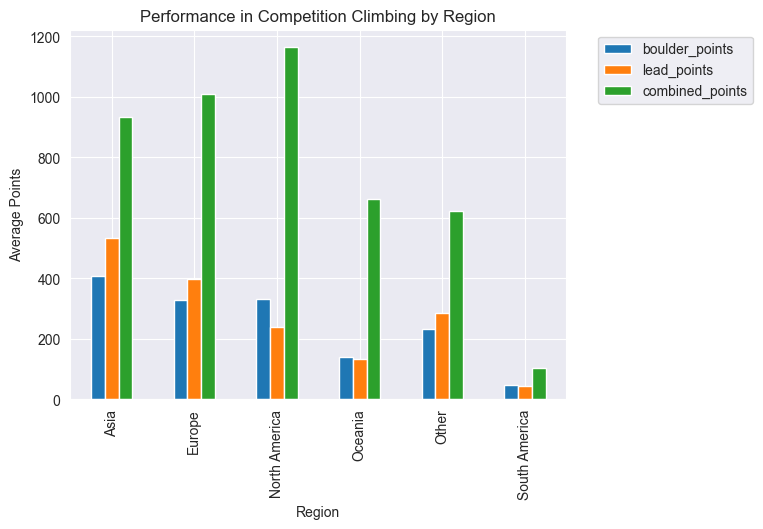

In [22]:
df.groupby('region')[['boulder_points', 'lead_points', 'combined_points']].mean().plot(kind='bar')
# Move the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Region')
plt.ylabel('Average Points')
plt.title('Performance in Competition Climbing by Region')
plt.show()

We can see that:
- North America is the best in the combined discipline
- Asia is the best in boulder and lead disciplines

Now let's analyze performance by region in outdoor climbing

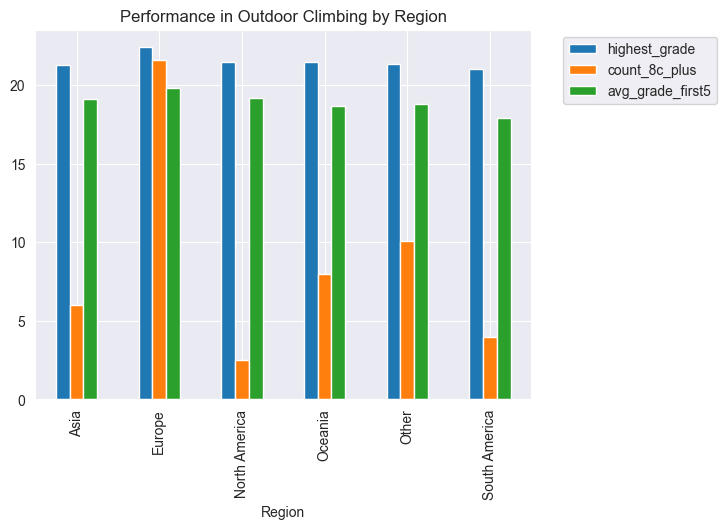

In [23]:
df.groupby('region')[['highest_grade', 'count_8c_plus', 'avg_grade_first5']].mean().plot(kind='bar')
# Move the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Region')
plt.title('Performance in Outdoor Climbing by Region')
plt.show()

The graph shows that:
- Highest grade achieved and the avg of grades seem to be similar among all regions
- European climbers have the most 8c+ and above ascents

## Gender and Climbing Performance
Analyze the relationship between gender and competition climbing

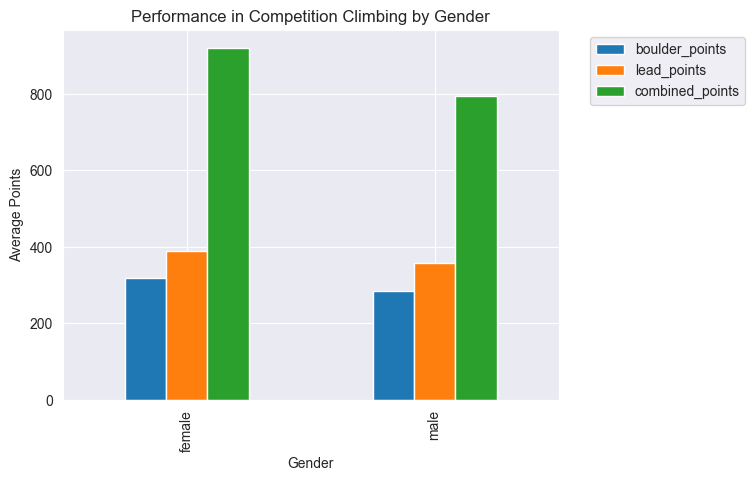

In [24]:
df.groupby('gender')[['boulder_points', 'lead_points', 'combined_points']].mean().plot(kind='bar')
# Move the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Gender')
plt.ylabel('Average Points')
plt.title('Performance in Competition Climbing by Gender')
plt.show()

Boulder and lead performances appear similar across genders. However, females seem to outperform males in the combined discipline, which is a pleasant surprise.
- This might be due to setters not being familiar enough with female climber abilities which might result in easier climbs, as most of the setters in competition climbing are males.

Analyze the relationship between gender and outdoor climbing

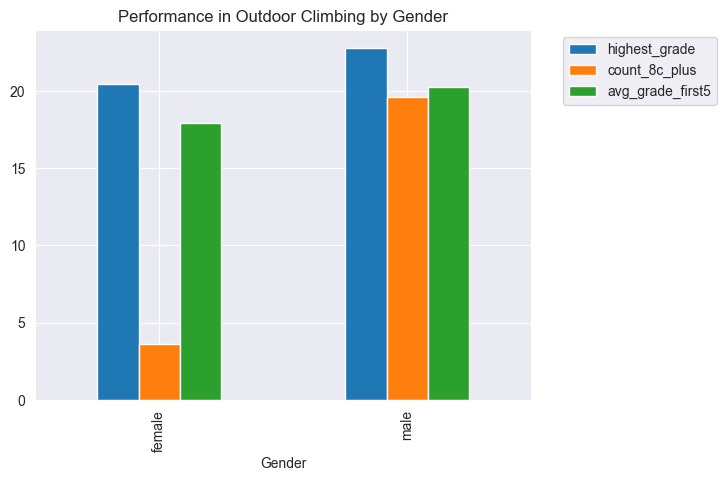

In [25]:
df.groupby('gender')[['highest_grade', 'count_8c_plus', 'avg_grade_first5']].mean().plot(kind='bar')
# Move the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Gender')
plt.title('Performance in Outdoor Climbing by Gender')
plt.show()

The 8c+ grade appears to be a significant barrier for women, as the average number of such ascents is much lower compared to men. Other metrics show a similar pattern among genders, with female averages generally slightly lower.

## Outdoor Sport Climbing Analysis
Let's create a subset for outdoor climbers (eg. ones who have an 8a.nu account)

In [26]:
outdoor_climbers = df[df['highest_grade'] > 0]

#### Distribution of Highest Grades Achieved

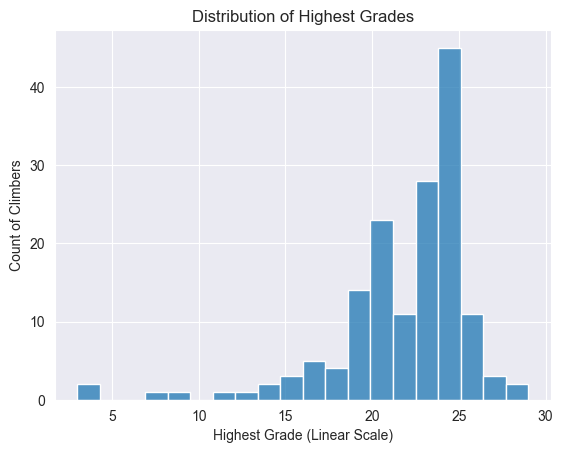

In [27]:
sns.histplot(outdoor_climbers['highest_grade'], bins=20)
plt.title('Distribution of Highest Grades')
plt.xlabel('Highest Grade (Linear Scale)')
plt.ylabel('Count of Climbers')
plt.show()

The distribution of highest grades among outdoor climbers (converted to a linear scale, see `1.3_8anu_profile_scraper.ipynb`) **peaks at 24-25**, which corresponds to **French grades 8c to 8c+**, which is quite high! I mean the best grade I climbed is 6a for reference.

#### Distribution of 8c+ and Above Ascents

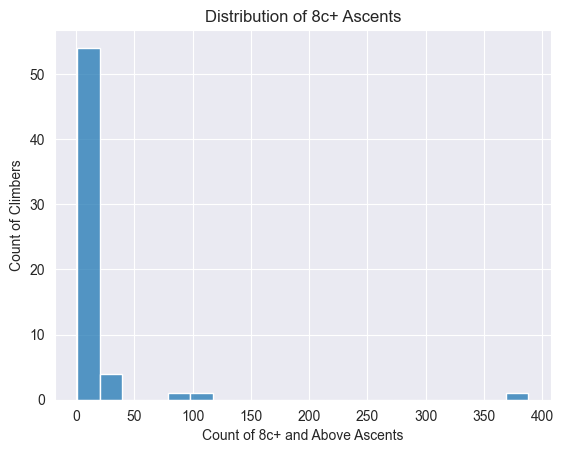

In [28]:
sns.histplot(outdoor_climbers['count_8c_plus'], bins=20)
plt.title('Distribution of 8c+ Ascents')
plt.xlabel('Count of 8c+ and Above Ascents')
plt.ylabel('Count of Climbers')
plt.show()

Again that is a very right skewed graph, while most climbers have less than 50 ascents in 8c+ plus, there are some climbers who have very high ascent counts, notably Adam Ondra is an outlier with 388 8c+ and above ascent counts.

#### Distributions of Average Grades

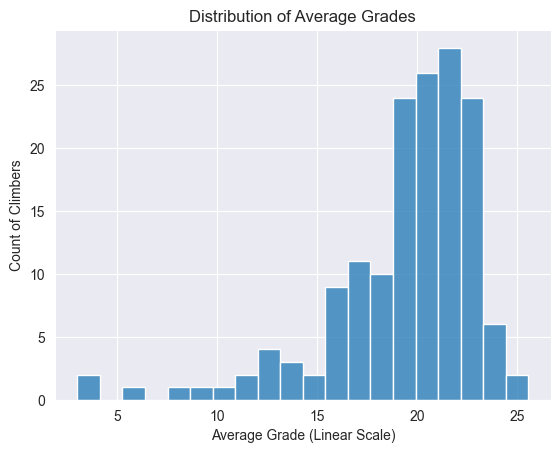

In [29]:
sns.histplot(outdoor_climbers['avg_grade_first5'], bins=20)
plt.title('Distribution of Average Grades')
plt.xlabel('Average Grade (Linear Scale)')
plt.ylabel('Count of Climbers')
plt.show()

The distribution of average grades (averaged by converting to a linear scale, see `1.3_8anu_profile_scraper.ipynb`) peaks at around 22, which corresponds to the French grade of 8b+.

## Relationship between Competition Climbing and Outdoor Sport Climbing

#### Distribution of Competition Points of Climbers who have Climbed 8c+ or Above

In [37]:
outdoor_boulder = df[(df['boulder_points'] > 0) & (df['count_8c_plus'] > 0)] # Climbed 8c+ and boulder athlete
outdoor_lead = df[(df['lead_points'] > 0) & (df['count_8c_plus'] > 0)] # Climbed 8c+ and lead athlete
outdoor_combined = df[(df['combined_points'] > 0) & (df['count_8c_plus'] > 0)] # Climbed 8c+ and combined athlete

print("Number of climbers who have climbed 8c+ and competes in bouldering: ", len(outdoor_boulder) )
print("Number of climbers who have climbed 8c+ and competes in lead: ", len(outdoor_lead) )
print("Number of climbers who have climbed 8c+ and competes in combined: ", len(outdoor_combined) )


Number of climbers who have climbed 8c+ and competes in bouldering:  41
Number of climbers who have climbed 8c+ and competes in lead:  51
Number of climbers who have climbed 8c+ and competes in combined:  32


Out of 551 climbers, those are pretty low numbers. Let's see the distributions of competition points now

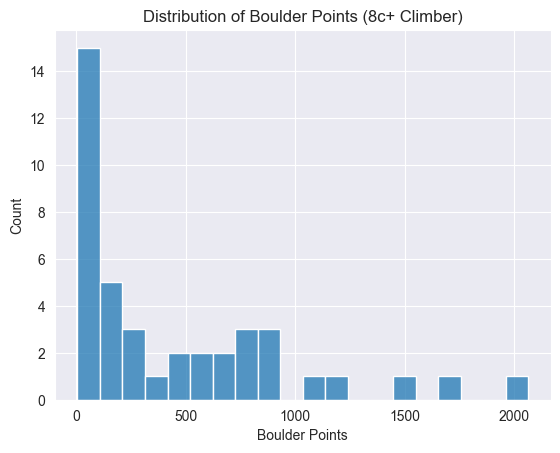

In [36]:
sns.histplot(outdoor_boulder['boulder_points'], bins=20)
plt.title('Distribution of Boulder Points (8c+ Climber)')
plt.xlabel('Boulder Points')
plt.show()

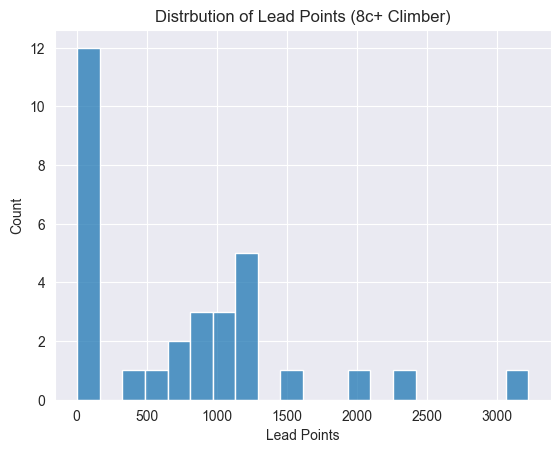

In [34]:
sns.histplot(outdoor_boulder['lead_points'], bins=20)
plt.title('Distribution of Lead Points (8c+ Climber)')
plt.xlabel('Lead Points')
plt.show()

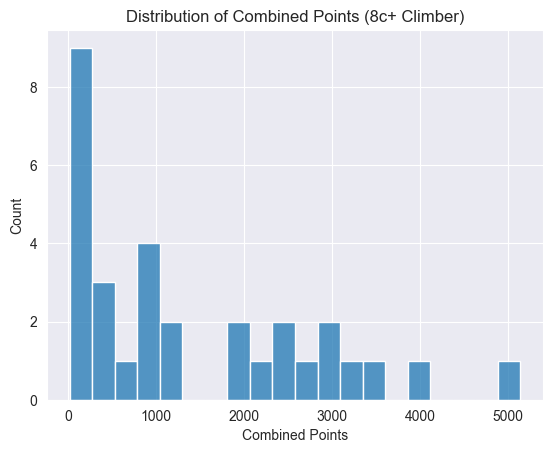

In [35]:
sns.histplot(outdoor_boulder['combined_points'], bins=20)
plt.title('Distribution of Combined Points (8c+ Climber)')
plt.xlabel('Combined Points')
plt.show()

The distributions of competition points of athletes who have climbed 8c+ in different distributions are all very skewed.

Investigate if competition points correlate with outdoor climbing metrics.

In [30]:
df[['boulder_points', 'lead_points','combined_points', 'highest_grade', 'count_8c_plus', 'avg_grade_first5']].corr()

,boulder_points,lead_points,combined_points,highest_grade,count_8c_plus,avg_grade_first5
boulder_points,1.000000,0.594028,0.828344,0.279095,0.201801,0.327078
lead_points,0.594028,1.000000,0.867148,0.168892,0.151183,0.184891
combined_points,0.828344,0.867148,1.000000,0.291508,0.218484,0.320946
highest_grade,0.279095,0.168892,0.291508,1.000000,0.646325,0.972376
count_8c_plus,0.201801,0.151183,0.218484,0.646325,1.000000,0.585244
avg_grade_first5,0.327078,0.184891,0.320946,0.972376,0.585244,1.000000


Visualize with scatter plots and heatmaps:

<Axes: >

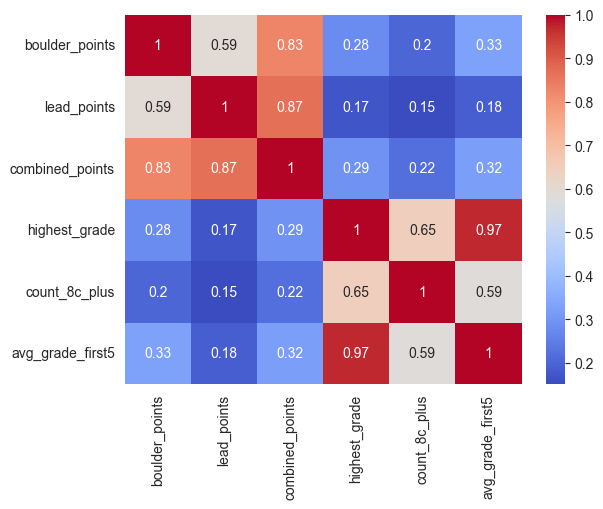

In [31]:
sns.heatmap(df[['boulder_points', 'lead_points','combined_points', 'highest_grade', 'count_8c_plus', 'avg_grade_first5']].corr(), cmap= 'coolwarm' , annot=True)


The heatmap shows little correlation between competition points and outdoor climbing metrics. However, competition climbing disciplines and outdoor climbing metrics shows stronger correlations within their respective groups.

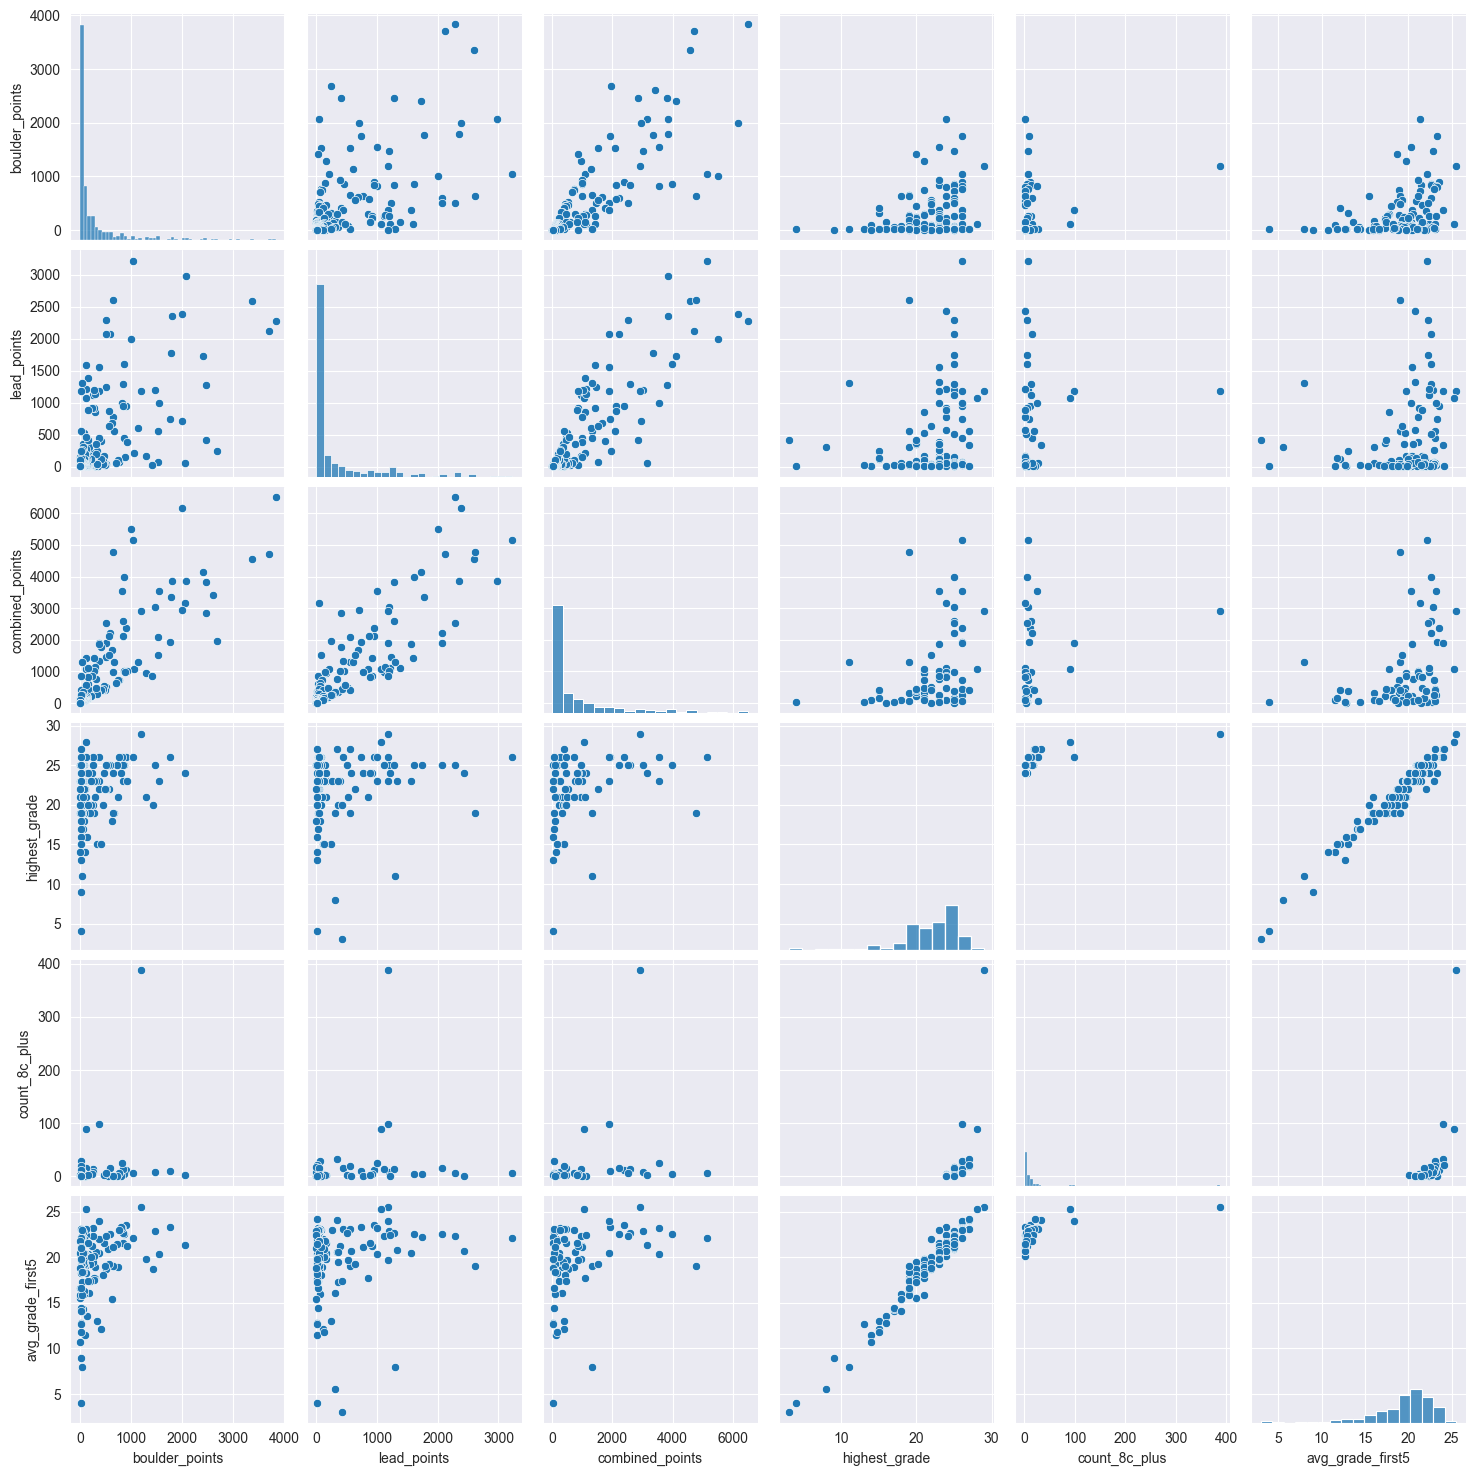

In [32]:
sns.pairplot(df[['boulder_points', 'lead_points', 'combined_points', 'highest_grade', 'count_8c_plus', 'avg_grade_first5']])

The relationship between competition climbing and outdoor sport climbing will be further explored by hypothesis tests in the next notebook.